# This code Visualize Key Performance Indicator for Ordinary and Smart Scheduling Approach

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Prepare data

In [3]:
# Prepare data
ordinary_data = {
    'Scenario': ['ukhealth_pool_120_50perc', 'ukhealth_pool_90_2h_50perc', 'ukhealth_pool_180', 'ukhealth_pool_150_2h'],
    'cost of shuttle/yr ($)': [10016621.58, 11046429.21, 16814624.76, 19771187.68],
    'net profit ($)': [-2424621.58, -3168429.21, -2031024.76, -4025587.68],
    'Cost per trip ($)': [26.39, 28.04, 22.75, 25.11],
    '% of cost from budget': [0.197765436, 0.218097676, 0.331983351, 0.390356921],
}

smart_data = {
    'Scenario': ['ukhealth_scheduling_90_50perc', 'ukhealth_scheduling_60_2h_50perc', 'ukhealth_scheduling_120', 'ukhealth_scheduling_90_2h'],
    'cost of shuttle/yr ($)': [6686758.78, 7913181.41, 10721004.85, 12235597.30],
    'net profit ($)': [770041.22, -149581.41, 4291395.15, 2953602.70],
    'Cost per trip ($)': [17.93, 20.39, 14.28, 16.11],
    '% of cost from budget': [0.132021536, 0.156235689, 0.211672587, 0.241576286],
}


# Convert data to DataFrame

In [4]:
# Original data
ordinary_df = pd.DataFrame(ordinary_data)
smart_df = pd.DataFrame(smart_data)

# Add scheduling type

In [5]:
# Add scheduling type
ordinary_df['Type'] = 'Ordinary'
smart_df['Type'] = 'Smart'

# Define scenario mapping (Scenario # → Real Names)

In [6]:
# Define scenario mapping (Scenario # → Real Names)
scenario_labels = {
    'Scenario 1': 'ukhealth_pool_120_50perc / ukhealth_scheduling_90_50perc',
    'Scenario 2': 'ukhealth_pool_90_2h_50perc / ukhealth_scheduling_60_2h_50perc',
    'Scenario 3': 'ukhealth_pool_180 / ukhealth_scheduling_120',
    'Scenario 4': 'ukhealth_pool_150_2h / ukhealth_scheduling_90_2h'
}


# Rename scenario labels in both datasets

In [7]:
# Rename scenario labels in both datasets
ordinary_df['Scenario'] = list(scenario_labels.keys())
smart_df['Scenario'] = list(scenario_labels.keys())

# Combine datasets

In [8]:
# Combine datasets
combined_df = pd.concat([ordinary_df, smart_df], ignore_index=True)

# Define Metrics to compare

In [9]:
# Metrics to compare
metrics = ['cost of shuttle/yr ($)', 'net profit ($)', 'Cost per trip ($)', '% of cost from budget']


# Visualize Results

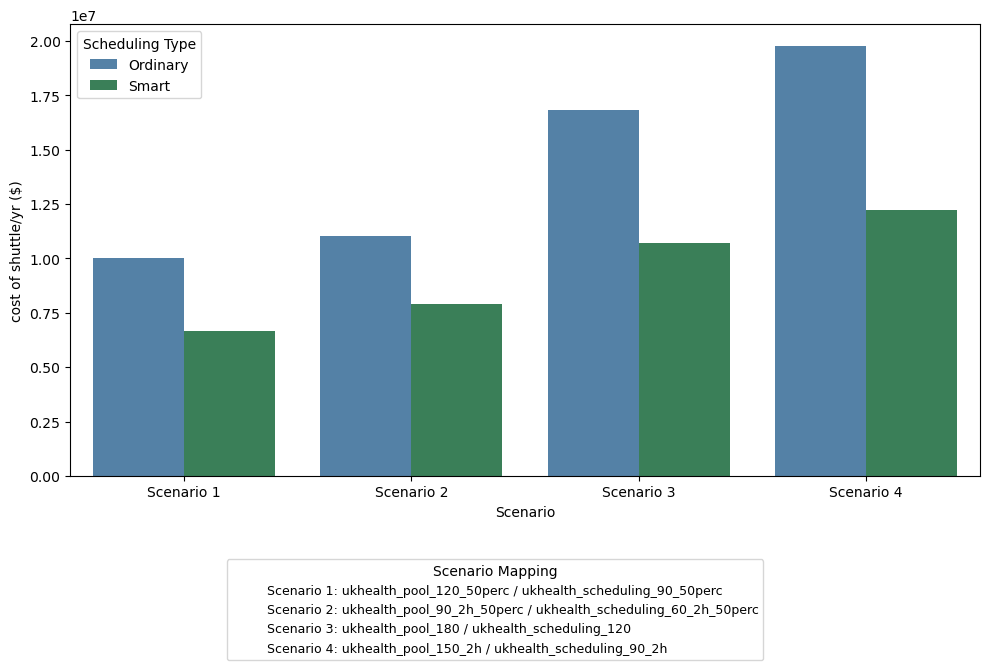

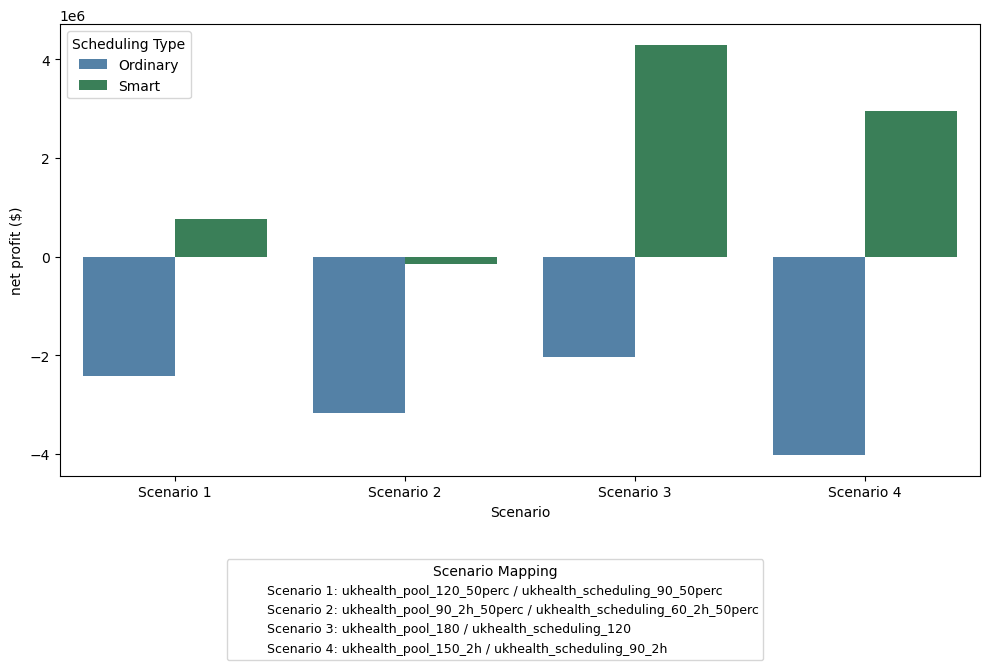

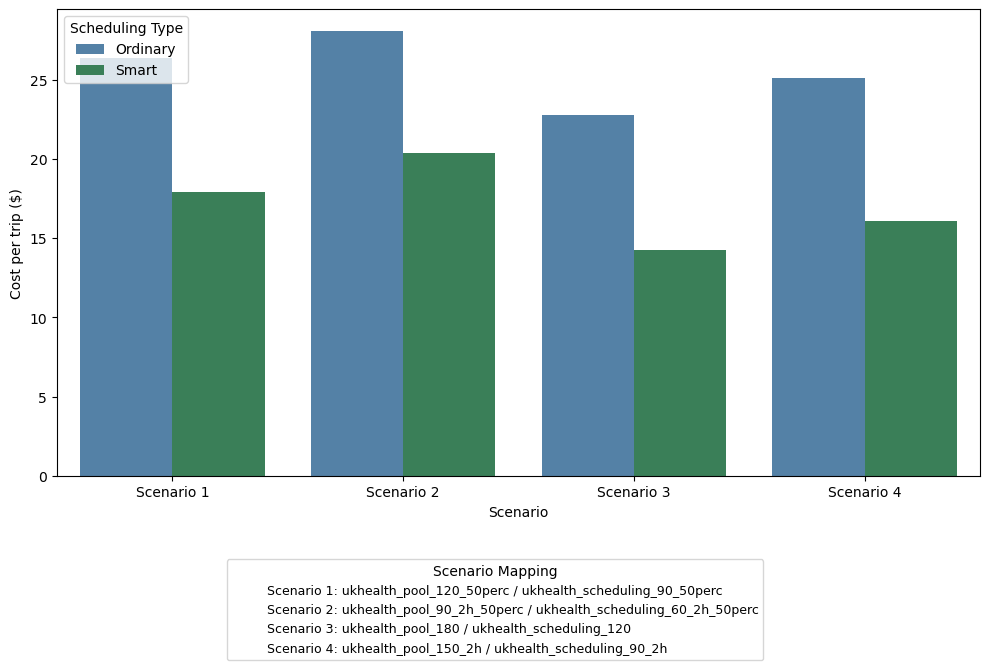

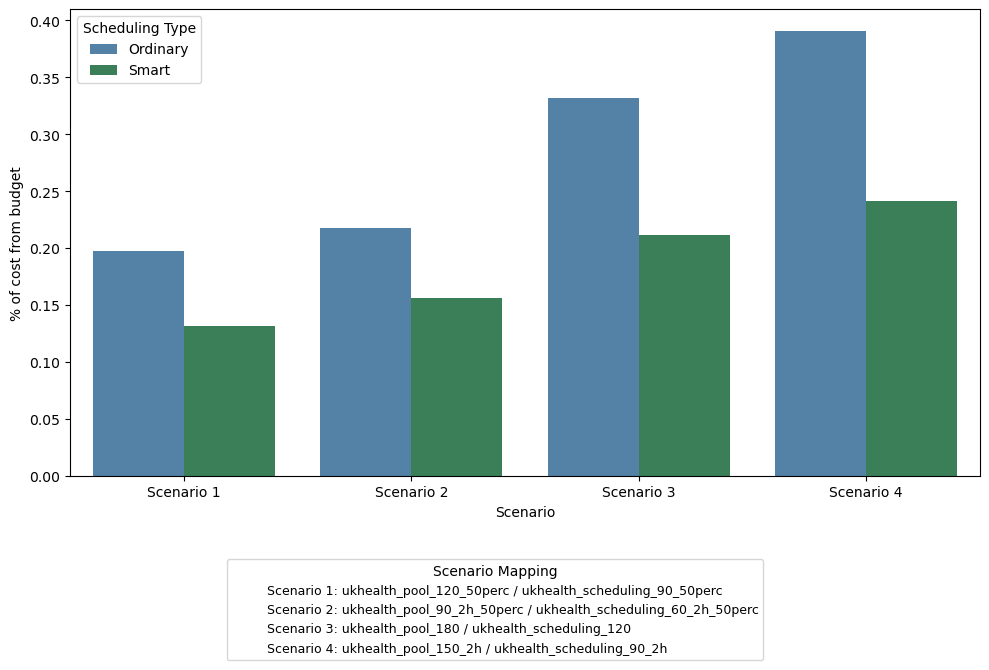

In [10]:
# Plot results
for metric in metrics:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x='Scenario', y=metric, hue='Type', data=combined_df, palette=['steelblue', 'seagreen'], ax=ax)

    #ax.set_title(f'Comparison of {metric} between Ordinary and Smart Scheduling', fontsize=14)
    ax.set_xlabel('Scenario')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=0)

    # Legend for scheduling type (Ordinary / Smart)
    handles1, labels1 = ax.get_legend_handles_labels()
    legend1 = ax.legend(handles=handles1, title='Scheduling Type', loc='upper left')

    # Legend for scenario mappings (placed below)
    scenario_handles = [
        Patch(color='none', label=f'{k}: {v}') for k, v in scenario_labels.items()
    ]
    fig.legend(handles=scenario_handles, title='Scenario Mapping', loc='lower center', ncol=1, frameon=True, fontsize=9, title_fontsize=10, bbox_to_anchor=(0.5, -0.12))

    plt.tight_layout(rect=[0, 0.1, 1, 1])  # Add space for bottom legend
    plt.show()
